## Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?


**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)



In [184]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Inspecting and Cleaning Data

In [185]:
df = pd.read_csv('all_data.csv')

In [186]:
print(df.head())
print(df.shape)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
(96, 4)


In [187]:
print(df['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [188]:
print(df['Year'].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


data is about the countries: Chile, China, Germany, Mexico, USA, Zimbabwe, and the data spans from 2000-2015. 

In [189]:
df = df.rename(columns={"Life expectancy at birth (years)":"life_expectancy_at_birth", "GDP":"GDP_Billions"})

In [190]:
print(df.columns)
print(df.head())

Index(['Country', 'Year', 'life_expectancy_at_birth', 'GDP_Billions'], dtype='object')
  Country  Year  life_expectancy_at_birth  GDP_Billions
0   Chile  2000                      77.3  7.786093e+10
1   Chile  2001                      77.3  7.097992e+10
2   Chile  2002                      77.8  6.973681e+10
3   Chile  2003                      77.9  7.564346e+10
4   Chile  2004                      78.0  9.921039e+10


In [191]:
df['GDP_Billions'] = df['GDP_Billions']/(10**9)
print(df.head())

  Country  Year  life_expectancy_at_birth  GDP_Billions
0   Chile  2000                      77.3     77.860932
1   Chile  2001                      77.3     70.979924
2   Chile  2002                      77.8     69.736811
3   Chile  2003                      77.9     75.643460
4   Chile  2004                      78.0     99.210393


In [192]:
print(df.dtypes)

Country                      object
Year                          int64
life_expectancy_at_birth    float64
GDP_Billions                float64
dtype: object


In [193]:
df['Year'] = df['Year'].apply(lambda x: float(x))
df['GDP_Billions'] = df['GDP_Billions'].apply(lambda x: float(x))

In [194]:
print(df.dtypes)

Country                      object
Year                        float64
life_expectancy_at_birth    float64
GDP_Billions                float64
dtype: object


In [195]:
chile = df[df['Country']=='Chile']
china = df[df['Country']=='China']
germany = df[df['Country']=='Germany']
mexico = df[df['Country']=='Mexico']
usa = df[df['Country']=='United States of America']
zimbabwe = df[df['Country']=='Zimbabwe']


## Visualizing GDP 

General Distribution of GDP Data:

<Figure size 576x432 with 0 Axes>

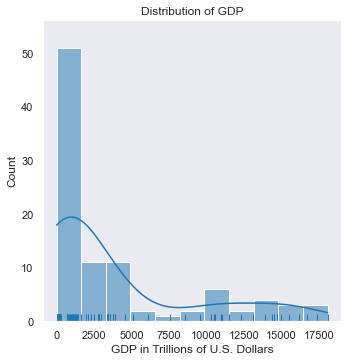

In [196]:
plt.figure(figsize=(8,6))
sns.displot(df['GDP_Billions'], rug = True, kde=True)
plt.title('Distribution of GDP')
plt.xlabel("GDP in Trillions of U.S. Dollars");

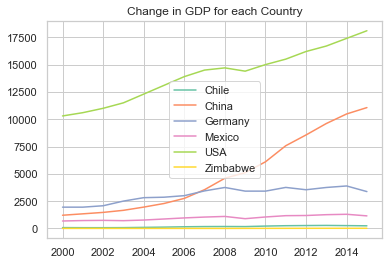

In [197]:

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.set_context('notebook')
ax = plt.subplots()
plt.title('Change in GDP for each Country')
plt.plot(chile['Year'], chile['GDP_Billions'], label='Chile')
plt.plot(china['Year'], china['GDP_Billions'], label='China')
plt.plot(germany['Year'], germany['GDP_Billions'], label='Germany')
plt.plot(mexico['Year'], mexico['GDP_Billions'], label='Mexico')
plt.plot(usa['Year'], usa['GDP_Billions'], label='USA')
plt.plot(zimbabwe['Year'], zimbabwe['GDP_Billions'], label='Zimbabwe')
plt.legend(loc=0)
plt.show()

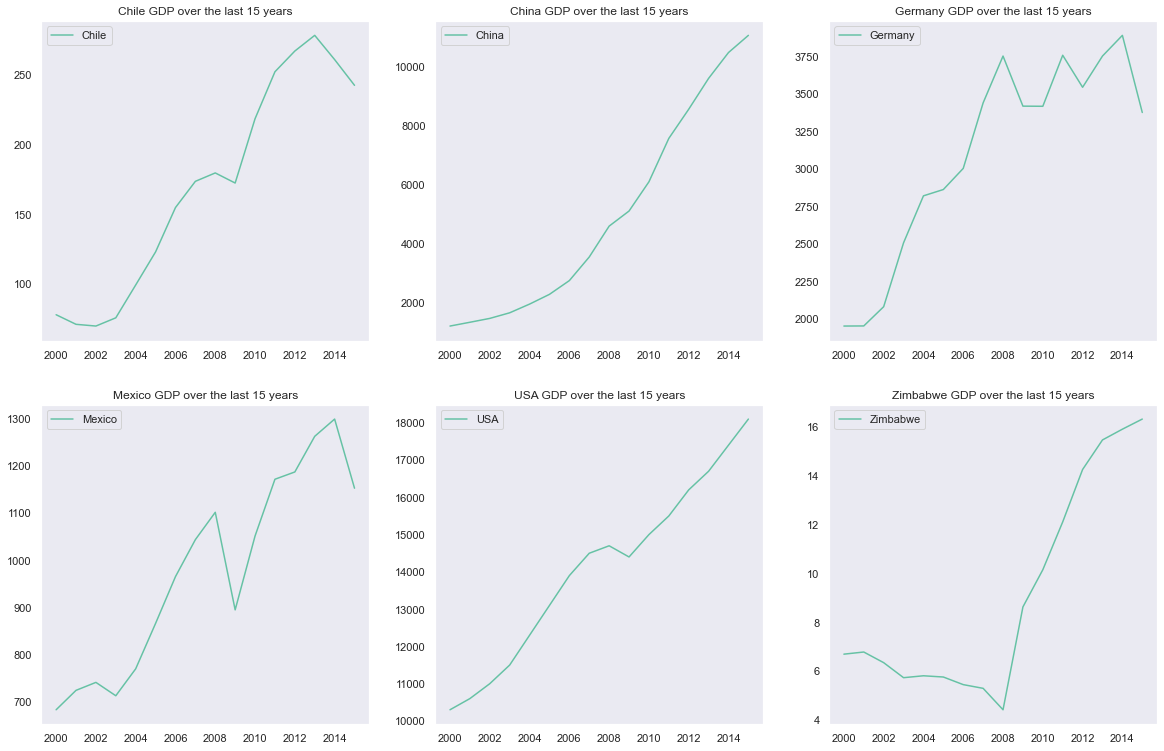

In [198]:
sns.set_style('dark')
sns.set_palette('Set2')
plt.figure(figsize=(20,20))

ax1 = plt.subplot(3,3,1)
ax1.set_title('Chile GDP over the last 15 years')
ax1 = plt.plot(chile['Year'],chile['GDP_Billions'],label='Chile')
plt.legend(loc=0)

ax2 = plt.subplot(3,3,2)
ax2.set_title('China GDP over the last 15 years')
ax2 = plt.plot(china['Year'],china['GDP_Billions'],label='China')
plt.legend(loc=0)

ax3 = plt.subplot(3,3,3)
ax3.set_title('Germany GDP over the last 15 years')
ax3 = plt.plot(germany['Year'],germany['GDP_Billions'],label='Germany')
plt.legend(loc=0)

ax4 = plt.subplot(3,3,4)
ax4.set_title('Mexico GDP over the last 15 years')
ax4 = plt.plot(mexico['Year'],mexico['GDP_Billions'],label='Mexico')
plt.legend(loc=0)

ax5 = plt.subplot(3,3,5)
ax5.set_title('USA GDP over the last 15 years')
ax5 = plt.plot(usa['Year'],usa['GDP_Billions'],label='USA')
plt.legend(loc=0)

ax6 = plt.subplot(3,3,6)
ax6.set_title('Zimbabwe GDP over the last 15 years')
ax6 = plt.plot(zimbabwe['Year'],zimbabwe['GDP_Billions'],label='Zimbabwe')
plt.legend(loc=0)

plt.show()

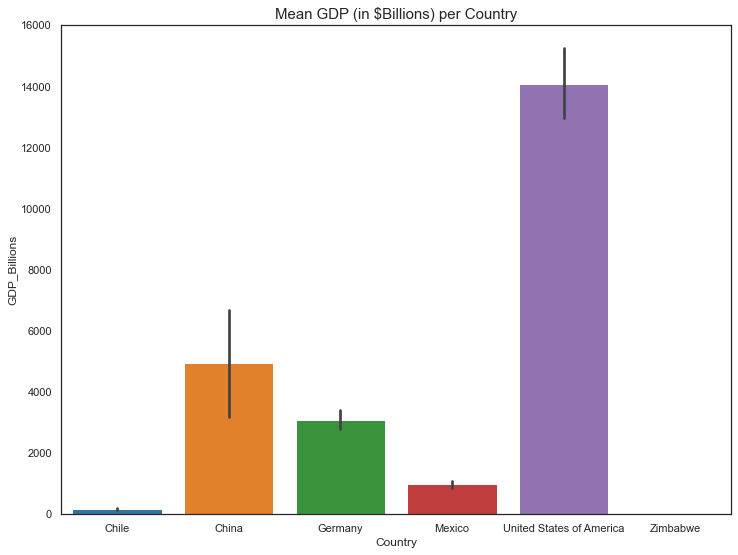

In [199]:
plt.figure(figsize=(12,9))
sns.set_style('white')
sns.set_palette('tab10')
sns.set_context('notebook')
sns.barplot(x=df['Country'], y=df['GDP_Billions'])
plt.title('Mean GDP (in $Billions) per Country', fontsize=15)
plt.show()

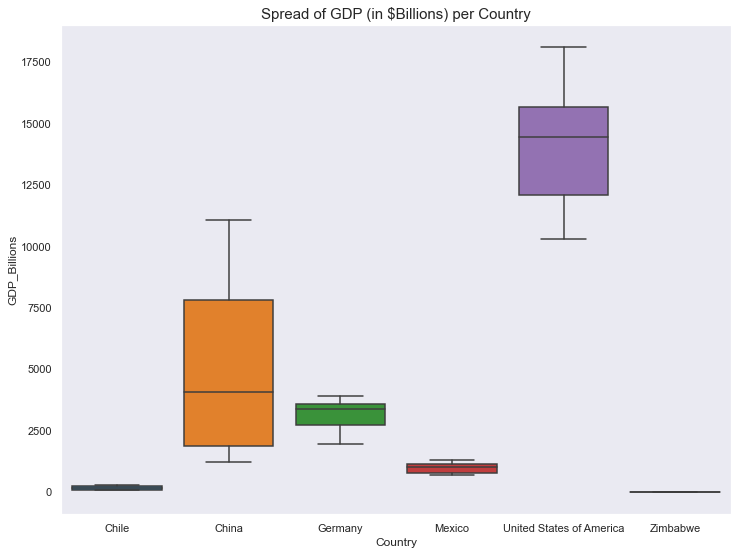

In [200]:
plt.figure(figsize=(12,9))
sns.set_style('dark')
sns.set_palette('tab10')
sns.set_context('notebook')
sns.boxplot(x=df['Country'], y=df['GDP_Billions'])
plt.title('Spread of GDP (in $Billions) per Country', fontsize=15)
plt.show()

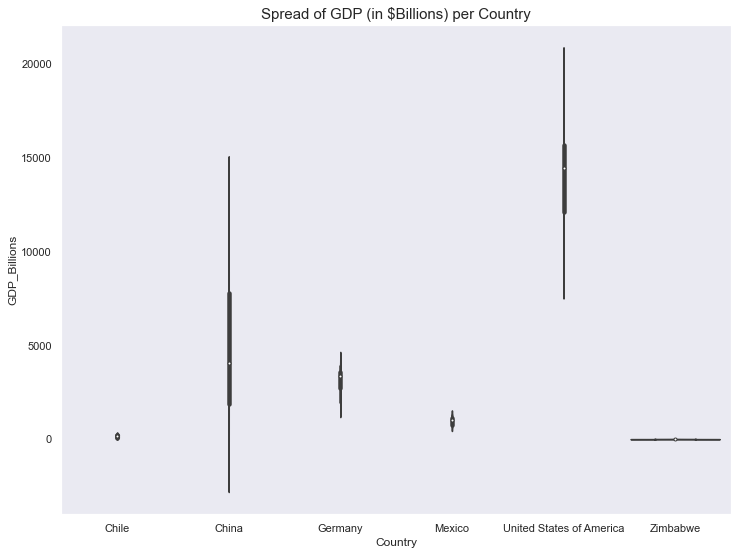

In [201]:
plt.figure(figsize=(12,9))
sns.set_style('dark')
sns.set_palette('tab10')
sns.set_context('notebook')
sns.violinplot(x=df['Country'], y=df['GDP_Billions'])
plt.title('Spread of GDP (in $Billions) per Country', fontsize=15)
plt.show()

## Visualizing Life Expectancy

General Distribution of Life Expectancy at Birth:

<Figure size 576x432 with 0 Axes>

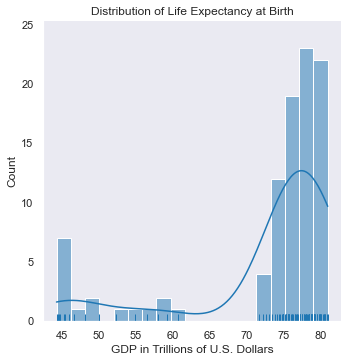

In [202]:
plt.figure(figsize=(8,6))
sns.displot(df['life_expectancy_at_birth'], rug = True, kde=True)
plt.title('Distribution of Life Expectancy at Birth')
plt.xlabel("GDP in Trillions of U.S. Dollars");

<Figure size 864x648 with 0 Axes>

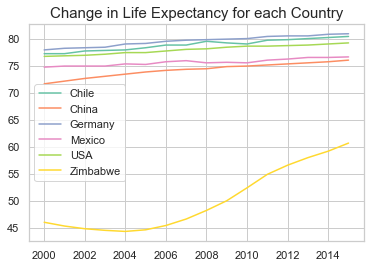

In [203]:
plt.figure(figsize=(12,9))
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.set_context('notebook')
ax = plt.subplots()
plt.title('Change in Life Expectancy for each Country', fontsize=15)
plt.plot(chile['Year'], chile['life_expectancy_at_birth'], label='Chile')
plt.plot(china['Year'], china['life_expectancy_at_birth'], label='China')
plt.plot(germany['Year'], germany['life_expectancy_at_birth'], label='Germany')
plt.plot(mexico['Year'], mexico['life_expectancy_at_birth'], label='Mexico')
plt.plot(usa['Year'], usa['life_expectancy_at_birth'], label='USA')
plt.plot(zimbabwe['Year'], zimbabwe['life_expectancy_at_birth'], label='Zimbabwe')
plt.legend(loc=0)
plt.show()

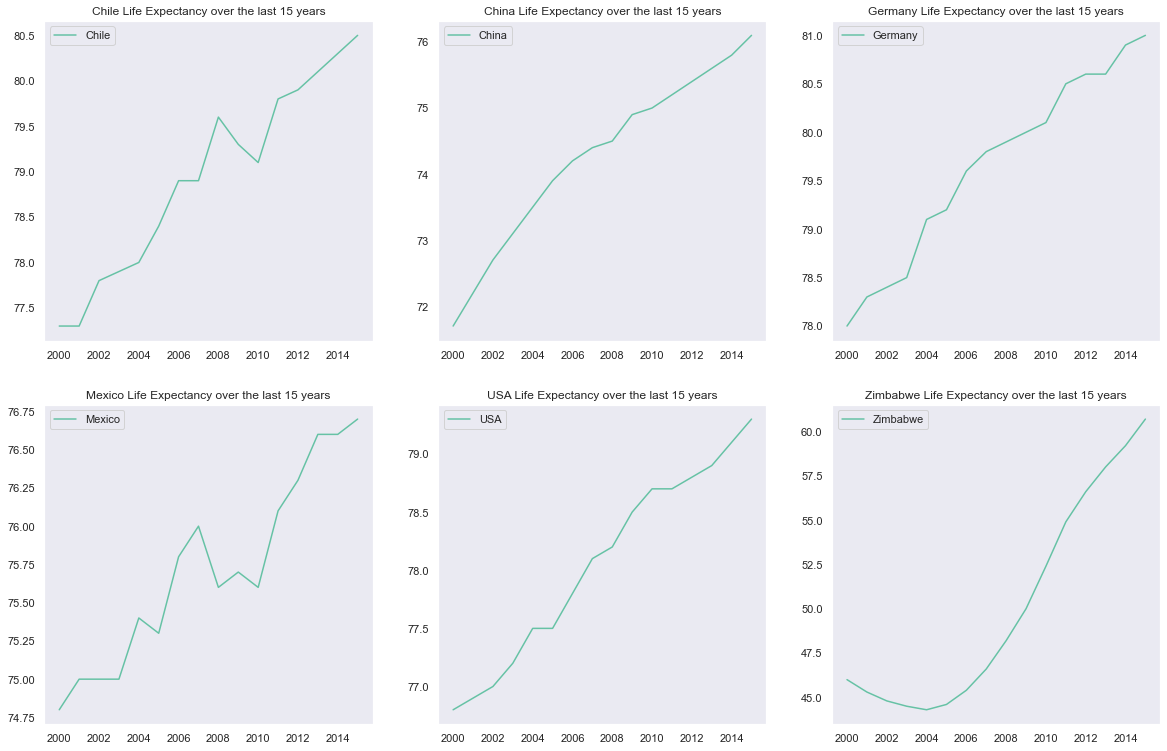

In [204]:
sns.set_style('dark')
sns.set_palette('Set2')
plt.figure(figsize=(20,20))

ax1 = plt.subplot(3,3,1)
ax1.set_title('Chile Life Expectancy over the last 15 years')
ax1 = plt.plot(chile['Year'],chile['life_expectancy_at_birth'],label='Chile')
plt.legend(loc=0)

ax2 = plt.subplot(3,3,2)
ax2.set_title('China Life Expectancy over the last 15 years')
ax2 = plt.plot(china['Year'],china['life_expectancy_at_birth'],label='China')
plt.legend(loc=0)

ax3 = plt.subplot(3,3,3)
ax3.set_title('Germany Life Expectancy over the last 15 years')
ax3 = plt.plot(germany['Year'],germany['life_expectancy_at_birth'],label='Germany')
plt.legend(loc=0)

ax4 = plt.subplot(3,3,4)
ax4.set_title('Mexico Life Expectancy over the last 15 years')
ax4 = plt.plot(mexico['Year'],mexico['life_expectancy_at_birth'],label='Mexico')
plt.legend(loc=0)

ax5 = plt.subplot(3,3,5)
ax5.set_title('USA Life Expectancy over the last 15 years')
ax5 = plt.plot(usa['Year'],usa['life_expectancy_at_birth'],label='USA')
plt.legend(loc=0)

ax6 = plt.subplot(3,3,6)
ax6.set_title('Zimbabwe Life Expectancy over the last 15 years')
ax6 = plt.plot(zimbabwe['Year'],zimbabwe['life_expectancy_at_birth'],label='Zimbabwe')
plt.legend(loc=0)

plt.show()

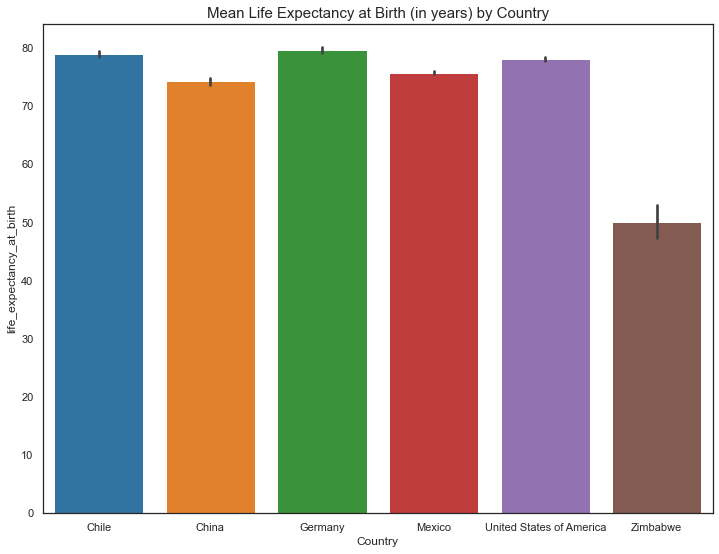

In [205]:
plt.figure(figsize=(12,9))
sns.set_style('white')
sns.set_palette('tab10')
sns.set_context('notebook')
sns.barplot(x=df['Country'], y=df['life_expectancy_at_birth'])
plt.title('Mean Life Expectancy at Birth (in years) by Country', fontsize=15)
plt.show()

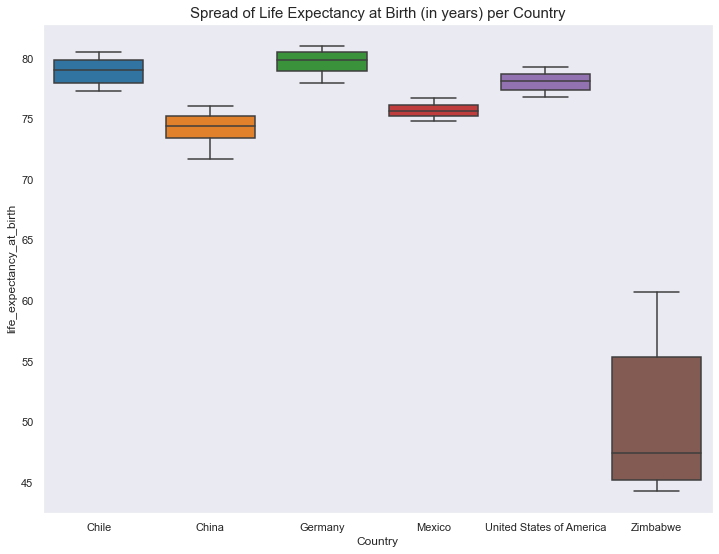

In [206]:
plt.figure(figsize=(12,9))
sns.set_style('dark')
sns.set_palette('tab10')
sns.set_context('notebook')
sns.boxplot(x=df['Country'], y=df['life_expectancy_at_birth'])
plt.title('Spread of Life Expectancy at Birth (in years) per Country', fontsize=15)
plt.show()

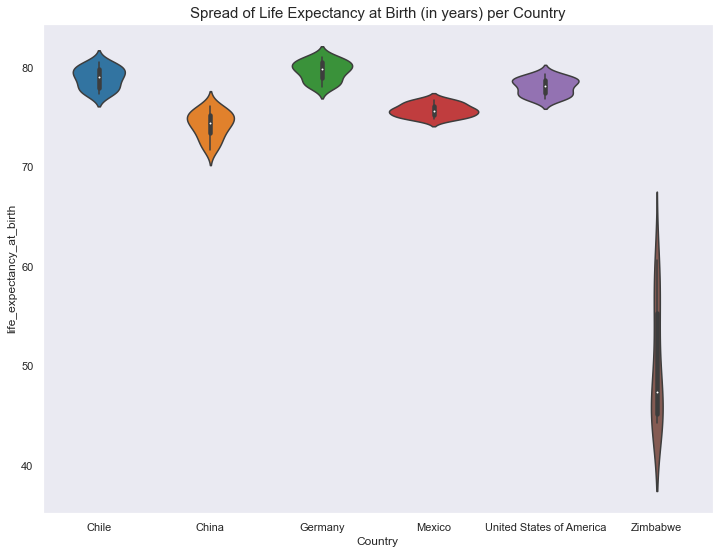

In [207]:
plt.figure(figsize=(12,9))
sns.set_style('dark')
sns.set_palette('tab10')
sns.set_context('notebook')
sns.violinplot(x=df['Country'], y=df['life_expectancy_at_birth'])
plt.title('Spread of Life Expectancy at Birth (in years) per Country', fontsize=15)
plt.show()

## Correlation between Life Expectancy at Birth and GDP

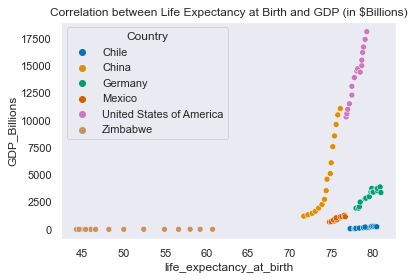

In [208]:
sns.set_palette('colorblind')
sns.set_style('dark')
sns.scatterplot(x=df['life_expectancy_at_birth'], y=df['GDP_Billions'], hue=df['Country'])
plt.title('Correlation between Life Expectancy at Birth and GDP (in $Billions)')
plt.show()

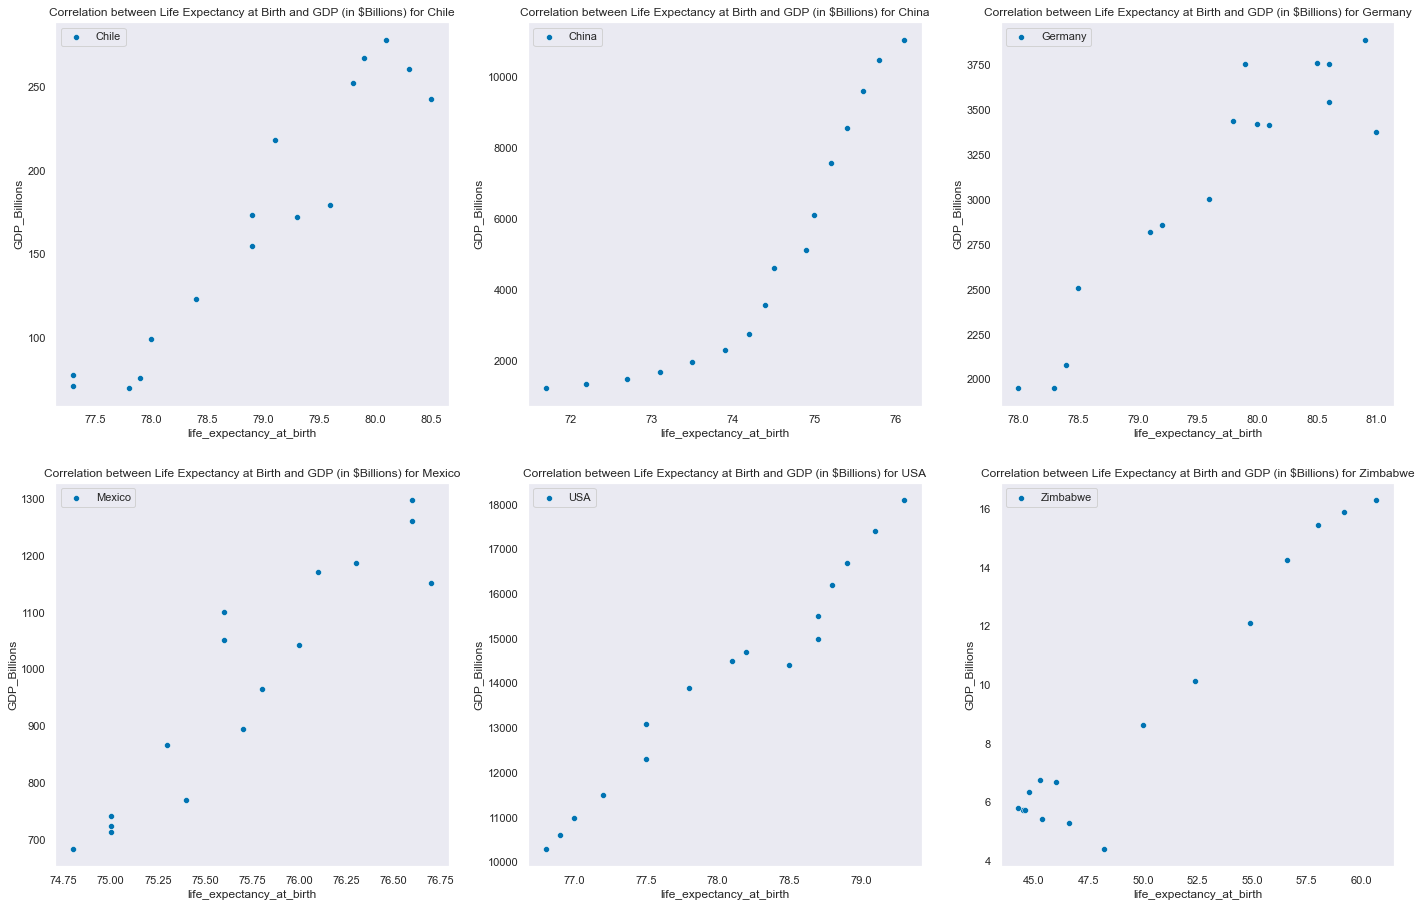

In [209]:
sns.set_palette('colorblind')
sns.set_style('dark')
plt.figure(figsize=(24,24))

ax1 = plt.subplot(3,3,1)
ax1.set_title('Correlation between Life Expectancy at Birth and GDP (in $Billions) for Chile')
ax1 = sns.scatterplot(x=chile['life_expectancy_at_birth'],y=chile['GDP_Billions'],label='Chile')
plt.legend(loc=0)

ax2 = plt.subplot(3,3,2)
ax2.set_title('Correlation between Life Expectancy at Birth and GDP (in $Billions) for China')
ax2 = sns.scatterplot(x=china['life_expectancy_at_birth'],y=china['GDP_Billions'],label='China')
plt.legend(loc=0)

ax3 = plt.subplot(3,3,3)
ax3.set_title('Correlation between Life Expectancy at Birth and GDP (in $Billions) for Germany')
ax3 = sns.scatterplot(x=germany['life_expectancy_at_birth'],y=germany['GDP_Billions'],label='Germany')
plt.legend(loc=0)

ax4 = plt.subplot(3,3,4)
ax4.set_title('Correlation between Life Expectancy at Birth and GDP (in $Billions) for Mexico')
ax4 = sns.scatterplot(x=mexico['life_expectancy_at_birth'],y=mexico['GDP_Billions'],label='Mexico')
plt.legend(loc=0)

ax5 = plt.subplot(3,3,5)
ax5.set_title('Correlation between Life Expectancy at Birth and GDP (in $Billions) for USA')
ax5 = sns.scatterplot(x=usa['life_expectancy_at_birth'],y=usa['GDP_Billions'],label='USA')
plt.legend(loc=0)

ax6 = plt.subplot(3,3,6)
ax6.set_title('Correlation between Life Expectancy at Birth and GDP (in $Billions) for Zimbabwe')
ax6 = sns.scatterplot(x=zimbabwe['life_expectancy_at_birth'],y=zimbabwe['GDP_Billions'],label='Zimbabwe')
plt.legend(loc=0)

plt.show()

## CONCLUSIONS

- Life Expectancy has increased over time in every nation, with Zimbabwe having the most drastic increase.
- GDP has increased over time in every nation, with China's GDP increasing at the fastest rate.
- Generally there is a positive correlation between Life Expectancy and GDP. As life expectancy increases, so does the GDP. However, the country with the highest GDP does not have the highest life expectancy.
- Life Expectancy for every country except Zimbabwe was above 70 years, with Zimbabwe being closer to 50 years.
